# 03 - Graphical Causal Models
 
 

 
## Thinking About Causality
 


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt

color=['0.3', '0.5', '0.7', '0.9']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

pd.set_option('display.max_rows', 6)

gr.set_default_format("png");

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/cross_sell_email.csv")
data

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
...,...,...,...,...
320,0,no_email,15,0
321,1,no_email,16,0
322,1,long,24,1



### Visualizing Causal Relationships 


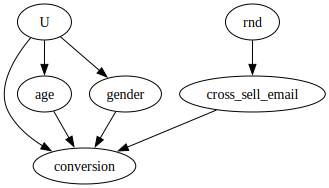

In [3]:
import graphviz as gr

g_cross_sell = gr.Digraph()

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "age")
g_cross_sell.edge("U", "gender")

g_cross_sell.edge("rnd", "cross_sell_email")
g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("age", "conversion")
g_cross_sell.edge("gender", "conversion")

g_cross_sell

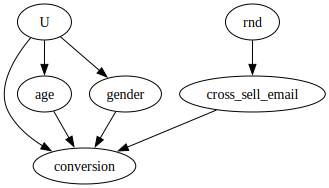

In [4]:
g_cross_sell = gr.Digraph()

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "age")
g_cross_sell.edge("U", "gender")

g_cross_sell.edge("rnd", "cross_sell_email")
g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("age", "conversion")
g_cross_sell.edge("gender", "conversion")

g_cross_sell

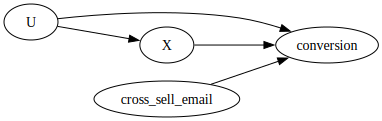

In [5]:
# rankdir:LR layers the graph from left to right
g_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "X")

g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("X", "conversion")

g_cross_sell

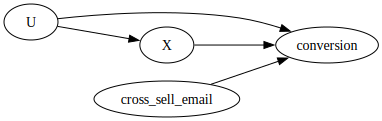

In [6]:
g_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "X")

g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("X", "conversion")

g_cross_sell

 
### Are Consultants Worth it?


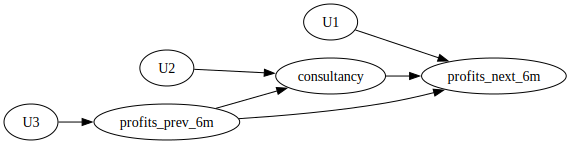

In [7]:
g_consultancy = gr.Digraph(graph_attr={"rankdir": "LR"})

g_consultancy.edge("U1", "profits_next_6m")
g_consultancy.edge("U2", "consultancy")
g_consultancy.edge("U3", "profits_prev_6m")

g_consultancy.edge("consultancy", "profits_next_6m")

g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("profits_prev_6m", "profits_next_6m")

g_consultancy

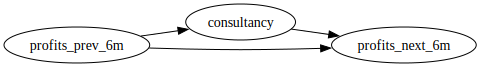

In [8]:
g_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"})

g_consultancy.edge("consultancy", "profits_next_6m")
g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("profits_prev_6m", "profits_next_6m")

g_consultancy

## Crash Course in Graphical Models
 
 
### Chains


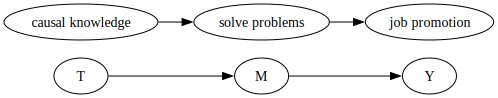

In [9]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})

g.edge("T", "M")
g.edge("M", "Y")
g.node("M", "M")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

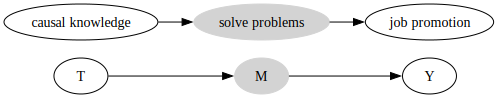

In [10]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})

g.edge("T", "M")
g.edge("M", "Y")
g.node("M", "M")
g.node("M", color="lightgrey", style="filled")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")
g.node("solve problems", color="lightgrey", style="filled")

g


### Forks
 


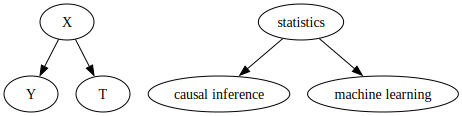

In [11]:
g = gr.Digraph()


g.edge("X", "Y")
g.edge("X", "T")
g.node("X", "X")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

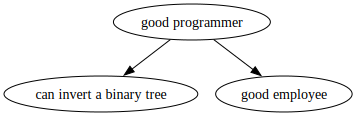

In [12]:
g = gr.Digraph()

g.edge("good programmer", "can invert a binary tree")
g.edge("good programmer", "good employee")

g


 
### Immorality or Collider 


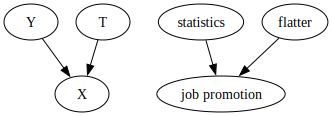

In [13]:
g = gr.Digraph()

g.edge("Y", "X")
g.edge("T", "X")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

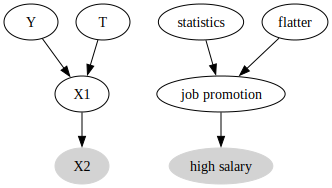

In [14]:
g = gr.Digraph()

g.edge("Y", "X1")
g.edge("T", "X1")
g.edge("X1", "X2")
g.node("X2", color="lightgrey", style="filled")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")
g.edge("job promotion", "high salary")

g.node("high salary", color="lightgrey", style="filled")

g

### The Flow of Association Cheat Sheet


### Querying a Graph in Python


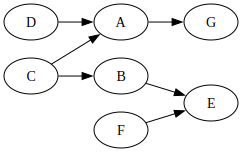

In [15]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

In [16]:
import networkx as nx
from networkx.algorithms.d_separation import is_d_separator

model = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G"),
])


In [17]:
print("Are D and C dependent?")
print(not(is_d_separator(model, {"D"}, {"C"}, set())))

print("Are D and C dependent given A?")
print(not(is_d_separator(model, {"D"}, {"C"}, {"A"})))

print("Are D and C dependent given G?")
print(not(is_d_separator(model, {"D"}, {"C"}, {"G"})))

Are D and C dependent?
False
Are D and C dependent given A?
True
Are D and C dependent given G?
True


In [18]:
print("Are G and D dependent?")
print(not(is_d_separator(model, {"G"}, {"D"}, set())))

print("Are G and D dependent given A?")
print(not(is_d_separator(model, {"G"}, {"D"}, {"A"})))

Are G and D dependent?
True
Are G and D dependent given A?
False


In [19]:
print("Are A and B dependent?")
print(not(is_d_separator(model, {"A"}, {"B"}, set())))

print("Are A and B dependent given C?")
print(not(is_d_separator(model, {"A"}, {"B"}, {"C"})))

Are A and B dependent?
True
Are A and B dependent given C?
False


In [20]:
print("Are G and F dependent?")
print(not(is_d_separator(model, {"G"}, {"F"}, set())))

print("Are G and F dependent given E?")
print(not(is_d_separator(model, {"G"}, {"F"}, {"E"})))

Are G and F dependent?
False
Are G and F dependent given E?
True



 
## Identification Revisited


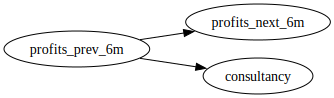

In [21]:
consultancy_sev = gr.Digraph(graph_attr={"rankdir": "LR"})
consultancy_sev.edge("profits_prev_6m", "profits_next_6m")
consultancy_sev.edge("profits_prev_6m", "consultancy")

consultancy_sev

In [22]:
consultancy_model_severed = nx.DiGraph([
    ("profits_prev_6m", "profits_next_6m"),
    ("profits_prev_6m", "consultancy"),
#     ("consultancy", "profits_next_6m"), # causal relationship removed
])

not(is_d_separator(consultancy_model_severed,
                   {"consultancy"}, {"profits_next_6m"}, set()))

True

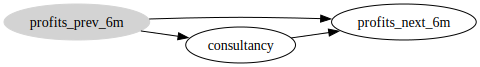

In [23]:
g_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"})
g_consultancy.edge("profits_prev_6m", "profits_next_6m")
g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("consultancy", "profits_next_6m")
g_consultancy.node("profits_prev_6m", color="lightgrey", style="filled")

g_consultancy

## CIA and The Adjustment Formula
 
## Positivity Assumption


## An Identification Example with Data


In [24]:
df = pd.DataFrame(dict(
    profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
    consultancy=[0, 0, 1, 0, 1, 1],
    profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
))

df

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


In [25]:
(df.query("consultancy==1")["profits_next_6m"].mean() 
 - df.query("consultancy==0")["profits_next_6m"].mean())

1.666666666666667

In [26]:
avg_df = (df
          .groupby(["consultancy", "profits_prev_6m"])
          ["profits_next_6m"]
          .mean())

avg_df.loc[1] - avg_df.loc[0] 

profits_prev_6m
1.0    0.15
5.0    0.20
Name: profits_next_6m, dtype: float64

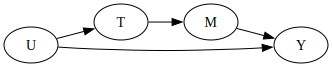

In [27]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})
g.edge("U", "T")
g.edge("U", "Y")
g.edge("T", "M")
g.edge("M", "Y")

g

## Confounding Bias
 
The first significant cause of bias is confounding. It's the bias we've been discussing so far. Now, we are just putting a name to it. **Confounding happens when there is an open backdoor path through which association flows non-causally, usually because the treatment and the outcome share a common cause**. For example, let's say that you work in HR and you want to know if your new management training program is increasing employers' engagement. However, since the training is optional, you believe only managers that are already doing great attend the program and those who need it the most, don't. When you measure engagement of the teams under the managers that took the training, it is much higher than that of the teams under the managers who didn't attend the training. But it's hard to know how much of this is causal. Since there is a common cause between treatment and outcome (the training and being a good manager, respectively) they would move together regardless of a causal effect. 
 
To identify that causal effect, you need to close all backdoor paths between the treatment and the outcome. If you do so, the only effect that will be left is the direct effect $T \to Y$. In our example, you could somehow control for the manager's quality prior to taking the training. In that situation, the difference in the outcome will be only due to the training, since manager quality prior to the training would be held constant between treatment and control. Simply put, **to adjust for confounding bias, you need to adjust for the common causes of the treatment and the outcome**.

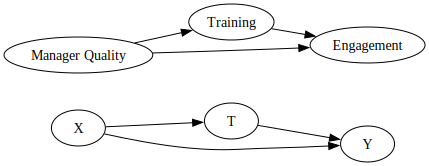

In [28]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Manager Quality", "Training"),
g.edge("Manager Quality", "Engagement"),
g.edge("Training", "Engagement")

g


### Surrogate Confounding


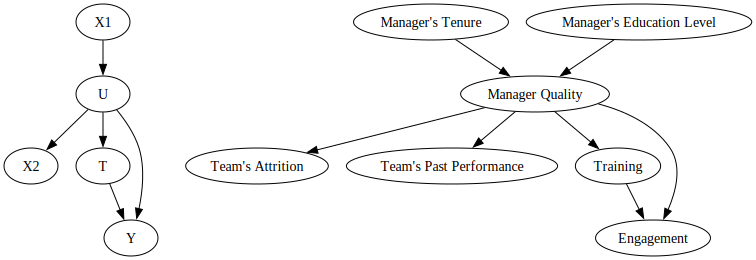

In [29]:
g = gr.Digraph()
g.edge("X1", "U")
g.edge("U", "X2")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Manager Quality", "Team's Attrition")
g.edge("Manager Quality", "Team's Past Performance")
g.edge("Manager's Tenure", "Manager Quality")
g.edge("Manager's Education Level", "Manager Quality")

g.edge("Manager Quality", "Training")
g.edge("Training", "Engagement")
g.edge("Manager Quality", "Engagement")

g

### Randomization Revisited


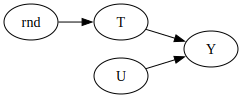

In [30]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})
g.edge("rnd", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g

## Selection Bias
 
### Conditioning on a Collider


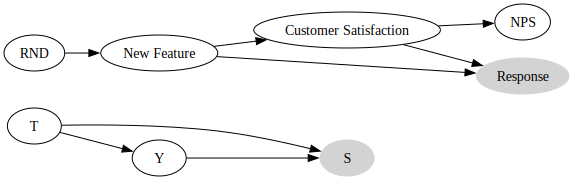

In [31]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("T", "S")
g.edge("T", "Y")
g.edge("Y", "S")
g.node("S", color="lightgrey", style="filled")

g.edge("RND", "New Feature"),
g.edge("New Feature", "Customer Satisfaction"),
g.edge("Customer Satisfaction", "NPS"),
g.edge("Customer Satisfaction", "Response"),
g.edge("New Feature", "Response"),
g.node("Response", "Response", color="lightgrey", style="filled")

g

In [32]:
nps_model = nx.DiGraph([
   ("RND", "New Feature"),
#     ("New Feature", "Customer Satisfaction"),
    ("Customer Satisfaction", "NPS"),
    ("Customer Satisfaction", "Response"),
    ("New Feature", "Response"),
])


not(is_d_separator(nps_model, {"NPS"}, {"New Feature"}, {"Response"}))

True

In [33]:
np.random.seed(2)
n = 100000
new_feature = np.random.binomial(1, 0.5, n)

satisfaction_0 = np.random.normal(0, 0.5, n)
satisfaction_1 = satisfaction_0 + 0.4
satisfaction = new_feature*satisfaction_1 + (1-new_feature)*satisfaction_0

nps_0 = np.random.normal(satisfaction_0, 1)
nps_1 = np.random.normal(satisfaction_1, 1)
nps = new_feature*nps_1 + (1-new_feature)*nps_0


responded  = (np.random.normal(0 + new_feature + satisfaction, 1) > 1).astype(int)

tr_df = pd.DataFrame(dict(new_feature=new_feature,
                          responded=responded,
                          nps_0=nps_0,
                          nps_1=nps_1,
                          nps=nps))

tr_df_measurable = pd.DataFrame(dict(new_feature=new_feature,
                                     responded=responded,
                                     nps_0=np.nan,
                                     nps_1=np.nan,
                                     nps=np.where(responded, nps, np.nan)))

tr_df.groupby("new_feature").mean()

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,-0.005047,0.395015,-0.005047
1,0.639342,-0.005239,0.401082,0.401082


In [34]:
tr_df_measurable.groupby("new_feature").mean().assign(**{"nps": np.nan})

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,NaN,NaN,NaN
1,0.639342,NaN,NaN,NaN


In [35]:
tr_df_measurable.groupby(["responded", "new_feature"]).mean()

nps_0  nps_1       nps
responded new_feature                        
0         0              NaN    NaN       NaN
          1              NaN    NaN       NaN
1         0              NaN    NaN  0.314073
          1              NaN    NaN  0.536106

In [36]:
tr_df.groupby(["responded", "new_feature"]).mean()

nps_0     nps_1       nps
responded new_feature                              
0         0           -0.076869  0.320616 -0.076869
          1           -0.234852  0.161725  0.161725
1         0            0.314073  0.725585  0.314073
          1            0.124287  0.536106  0.536106

### Adjusting for Selection Bias


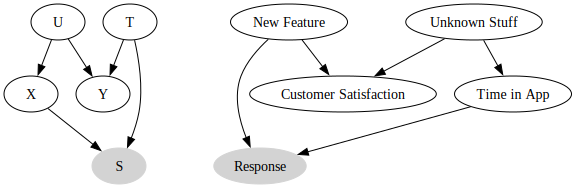

In [37]:
g = gr.Digraph()

g.edge("U", "X")
g.edge("X", "S")
g.edge("U", "Y")
g.edge("T", "Y")
g.edge("T", "S")
g.node("S", color="lightgrey", style="filled")

g.edge("New Feature", "Customer Satisfaction"),
g.edge("Unknown Stuff", "Customer Satisfaction"),
g.edge("Unknown Stuff", "Time in App"),
g.edge("Time in App", "Response"),
g.edge("New Feature", "Response"),

g.node("Response", "Response", color="lightgrey", style="filled")

g

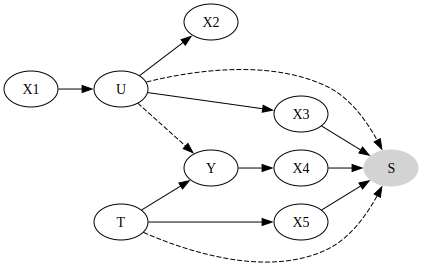

In [38]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})

g.edge("X1", "U")
g.edge("U", "X2")
g.edge("X5", "S")
g.edge("U", "Y",style="dashed")
g.edge("U", "S",style="dashed")
g.edge("U", "X3")
g.edge("X3", "S")
g.edge("Y", "X4")
g.edge("X4", "S")
g.edge("T", "X5")
g.edge("T", "Y")
g.edge("T", "S", style="dashed")
g.node("S", color="lightgrey", style="filled")

g

In [39]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})

g.edge("Y", "X")
g.edge("T", "X")
g.edge("T", "Y")

g;

### Conditioning on a Mediator


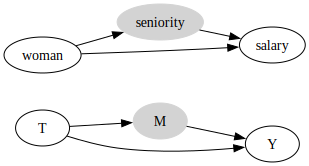

In [40]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("T", "M")
g.edge("T", "Y")
g.edge("M", "Y")
g.node("M", color="lightgrey", style="filled")

g.edge("woman", "seniority")
g.edge("woman", "salary")
g.edge("seniority", "salary")
g.node("seniority", color="lightgrey", style="filled")

g

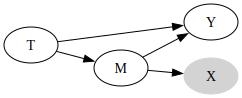

In [41]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("T", "M")
g.edge("T", "Y")
g.edge("M", "Y")
g.edge("M", "X")
g.node("X", color="lightgrey", style="filled")

g

## Key Ideas


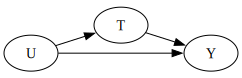

In [42]:
g = gr.Digraph(graph_attr={"rankdir":"LR", "ratio": "0.3"})
g.edge("U", "T")
g.edge("U", "Y")
g.edge("T", "Y")

g

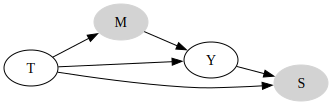

In [43]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})
g.edge("T", "M")
g.edge("M", "Y")
g.edge("T", "Y")
g.edge("T", "S")
g.edge("Y", "S")

g.node("M", color="lightgrey", style="filled")
g.node("S", color="lightgrey", style="filled")

g

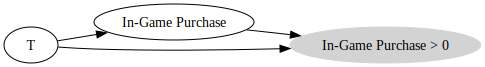

In [44]:
g = gr.Digraph(graph_attr={"rankdir":"LR"})
g.edge("T", "In-Game Purchase")
g.edge("T", "In-Game Purchase > 0")
g.edge("In-Game Purchase", "In-Game Purchase > 0")

g.node("In-Game Purchase > 0", color="lightgrey", style="filled")

g

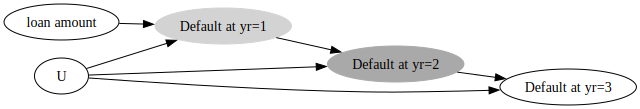

In [45]:
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("loan amount", "Default at yr=1")
g.edge("Default at yr=1", "Default at yr=2")
g.edge("Default at yr=2", "Default at yr=3")
g.edge("U", "Default at yr=1")
g.edge("U", "Default at yr=2")
g.edge("U", "Default at yr=3")

g.node("Default at yr=1", color="lightgrey", style="filled")
g.node("Default at yr=2", color="darkgrey", style="filled")

g